First 5 rows of the dataset:
   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
Model Performance:
Mean Squared Error (MSE): 2918458029.59
R^2 Score: 0.62


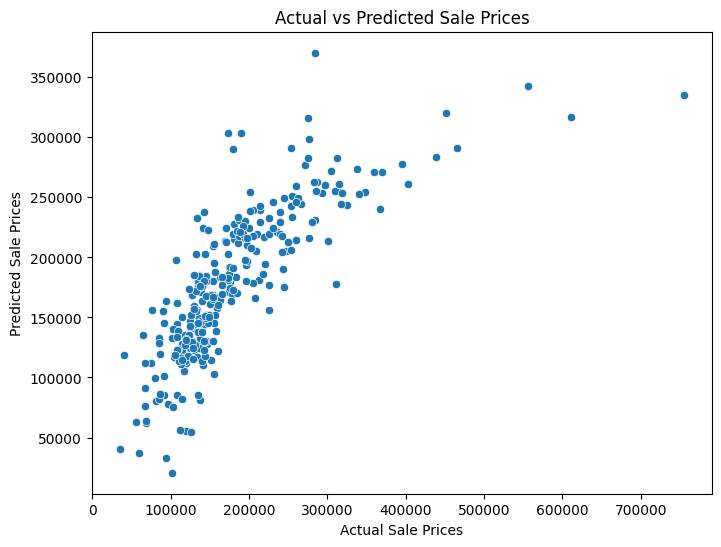

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load the dataset
file_path = '/content/HousePricePrediction.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Handle missing values if any (drop rows for simplicity)
df = df.dropna()

# Features and target
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Manually one-hot encode categorical features with drop_first to avoid multicollinearity
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Convert all columns to float to ensure consistent dtype for statsmodels
X = X.astype(float)

# Add constant term for statsmodels OLS
X = sm.add_constant(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using statsmodels OLS
model = sm.OLS(y_train, X_train)
results = model.fit()

# Predict on the test set
y_pred = results.predict(X_test)

# Evaluate the model
print("Model Performance:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

# Plotting predicted vs actual prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual vs Predicted Sale Prices")
plt.show()